# Assingment 5: SPARQL queries

Carlor Relaño

https://sparql.uniprot.org/

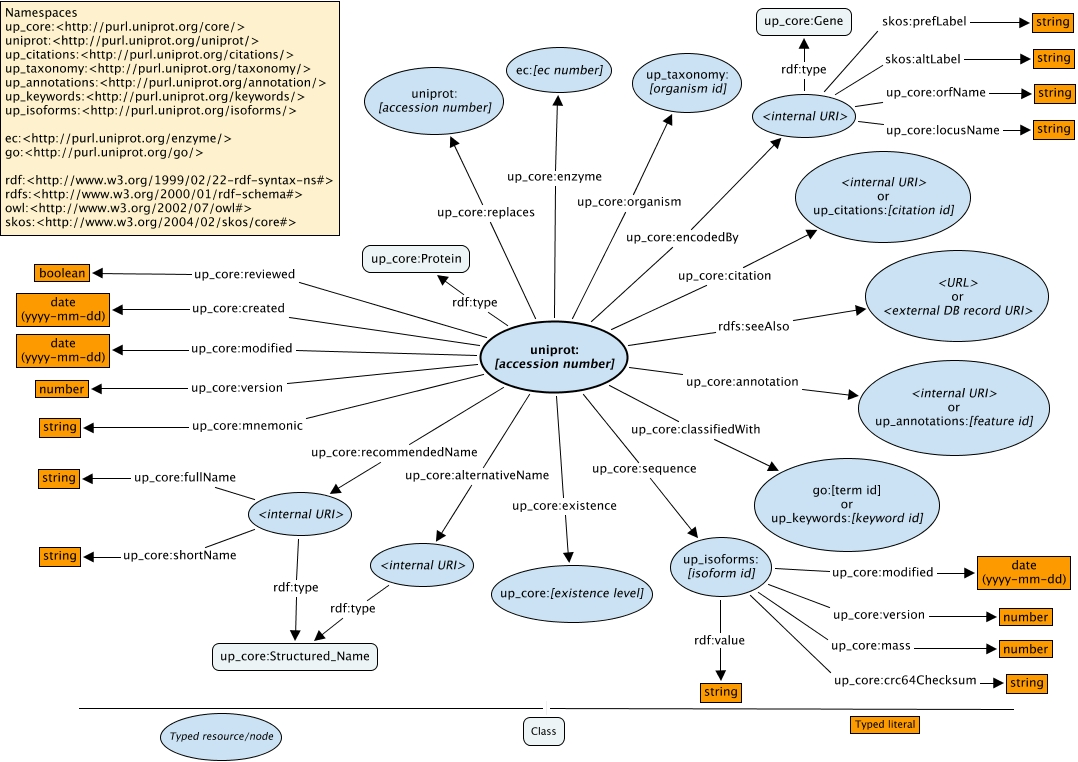

1. How many protein records are in UniProt? 

In [15]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX up: <http://purl.uniprot.org/core/>
SELECT (COUNT (?prot))
WHERE
{
    ?prot a up:Protein .
}

Endpoint set to: https://sparql.uniprot.org/sparql
Request format: JSON

callret-0
360157660


2. How many Arabidopsis thaliana protein records are in UniProt?

In [16]:
PREFIX up: <http://purl.uniprot.org/core/>
SELECT COUNT(?prot)
WHERE
{
    ?prot a up:Protein;
        up:organism ?org.
    ?org up:scientificName "Arabidopsis thaliana".
}

callret-0
136782


3. retrieve pictures of Arabidopsis thaliana from UniProt?

In [17]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?depiction
WHERE
{
    ?org up:scientificName "Arabidopsis thaliana";
         foaf:depiction ?depiction
    
} LIMIT 20

depiction
https://upload.wikimedia.org/wikipedia/commons/3/39/Arabidopsis.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Arabidopsis_thaliana_inflorescencias.jpg/800px-Arabidopsis_thaliana_inflorescencias.jpg


4. What is the description of the enzyme activity of UniProt Protein Q9SZZ8

In [18]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX uniprot: <http://purl.uniprot.org/uniprot/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?enzyme ?label
WHERE
{
    uniprot:Q9SZZ8 up:enzyme ?enzyme.
    ?enzyme skos:prefLabel ?label
} LIMIT 10

enzyme,label
http://purl.uniprot.org/enzyme/1.14.15.24,Beta-carotene 3-hydroxylase


5. Retrieve the proteins ids, and date of submission, for proteins that have been added to UniProt this year (HINT Google for “SPARQL FILTER by date”)

In [19]:
PREFIX up: <http://purl.uniprot.org/core/>

SELECT DISTINCT ?prot ?date
WHERE
{
    ?prot a up:Protein; 
        up:created ?date.
    FILTER (YEAR(?date) = 2021).
    
} LIMIT 5

prot,date
http://purl.uniprot.org/uniprot/A0A1H7ADE3,2021-06-02
http://purl.uniprot.org/uniprot/A0A1V1AIL4,2021-06-02
http://purl.uniprot.org/uniprot/A0A2Z0L603,2021-06-02
http://purl.uniprot.org/uniprot/A0A4J5GG53,2021-04-07
http://purl.uniprot.org/uniprot/A0A6G8SU52,2021-02-10


6. How many species are in the UniProt taxonomy?

In [20]:
PREFIX up: <http://purl.uniprot.org/core/>

SELECT COUNT(?species)
WHERE
{
    ?species a up:Taxon;
               up:rank up:Species.
} LIMIT 20

callret-0
2029846


7. How many species have at least one protein record? (this might take a long time to execute, so do this one last!)

In [26]:
PREFIX up: <http://purl.uniprot.org/core/>

SELECT COUNT(DISTINCT ?species)
WHERE
{
    ?species a up:Taxon;
               up:rank up:Species.
    ?prot up:organism ?species.
}

callret-0
1227793


8. Find the AGI codes and gene names for all Arabidopsis thaliana proteins that have a protein function annotation description that mentions “pattern formation”

In [21]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?locus ?name ?description
WHERE
{
    ?prot up:organism ?org;
          up:encodedBy ?gene;
          up:annotation ?annotation.
    ?org up:scientificName "Arabidopsis thaliana". 
    ?gene up:locusName ?locus;
          skos:prefLabel ?name.
    ?annotation rdfs:comment ?description.
    FILTER REGEX (?description, "pattern formation", "i").
} LIMIT 5

locus,name,description
At3g54220,SCR,"Transcription factor required for quiescent center cells specification and maintenance of surrounding stem cells, and for the asymmetric cell division involved in radial pattern formation in roots. Essential for cell division but not differentiation of the ground tissue. Also required for normal shoot gravitropism. Regulates the radial organization of the shoot axial organs. Binds to the promoter of MGP, NUC, RLK and SCL3. Restricts SHR movment and sequesters it into the nucleus of the endodermis."
At4g21750,ATML1,"Probable transcription factor involved in cell specification and pattern formation during embryogenesis. Binds to the L1 box DNA sequence 5'-TAAATG[CT]A-3'. Plays a role in maintaining the identity of L1 cells, possibly by interacting with their L1 box or other target-gene promoters; binds to the LIP1 gene promoter and stimulates its expression upon imbibition (PubMed:24989044). Acts as a positive regulator of gibberellins (GAs)-regulated epidermal gene expression (e.g. LIP1, LIP2, LTP1, FDH and PDF1) (PubMed:24989044). Functionally redundant to PDF2 (PubMed:24989044)."
At1g13980,GN,Activates the ARF proteins by exchanging bound GDP for free GTP. Plays a role in vesicular protein sorting. Acts as the major regulator of endosomal vesicle trafficking but is also involved in the endocytosis process. Could function redundantly with GNL1 in the retrograde Golgi to endoplasmic reticulum trafficking. Regulates vesicle trafficking required for the coordinated polar localization of auxin efflux carriers which in turn determines the direction of auxin flow. Mediates the sorting of PIN1 from endosomal compartments to the basal plasma membrane and the polarization of PIN3 to the bottom side of hypocotyl endodermal cells. Involved in the specification of apical-basal pattern formation in the early embryo and during root formation. Required for correct cell wall organization leading to normal cell adhesion during seedling development. Plays also an essential role in hydrotropism of seedling roots.
At5g40260,SWEET8,"Mediates both low-affinity uptake and efflux of sugar across the plasma membrane. Required, in pollen, for microspore cell integrity and primexine pattern formation (PubMed:18434608, PubMed:25988582)."
At1g69670,CUL3B,"Component of the cullin-RING ubiquitin ligases (CRL), or CUL3-RBX1-BTB protein E3 ligase complexes which mediate the ubiquitination and subsequent proteasomal degradation of target proteins. The functional specificity of the CRL complex depends on the BTB domain-containing protein as the susbstrate recognition component. Involved in embryo pattern formation and endosperm development. Required for the normal division and organization of the root stem cells and columella root cap cells. Regulates primary root growth by an unknown pathway, but in an ethylene-dependent manner. Functions in distal root patterning, by an ethylene-independent mechanism. Functionally redundant with CUL3A."


9. What is the MetaNetX Reaction identifier (starts with “mnxr”) for the UniProt Protein uniprotkb:Q18A79

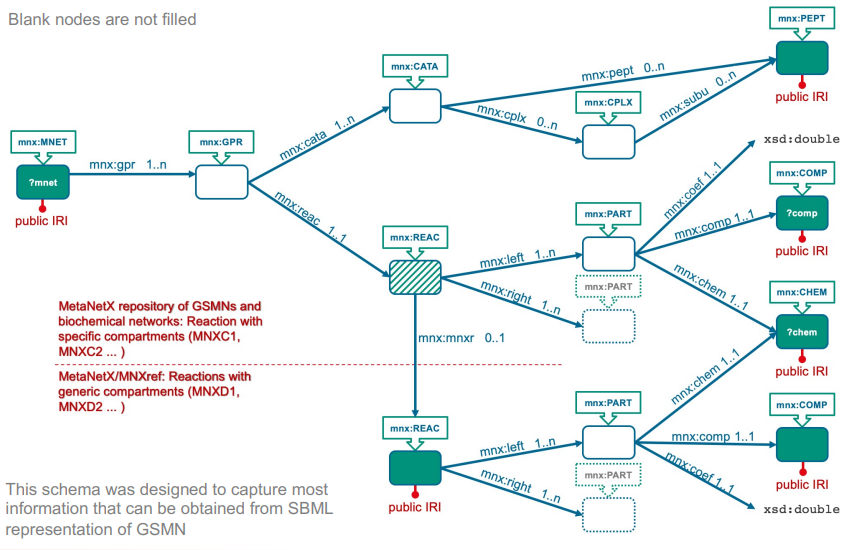

In [22]:
%endpoint https://rdf.metanetx.org/sparql

Endpoint set to: https://rdf.metanetx.org/sparql

In [23]:
PREFIX mnx: <https://rdf.metanetx.org/schema/>
PREFIX uniprot: <http://purl.uniprot.org/uniprot/>

SELECT ?label
WHERE
{
    ?pep mnx:peptXref uniprot:Q18A79.
    ?cata mnx:pept ?pep.
    ?gpr mnx:cata ?cata;
         mnx:reac ?reac.
    ?reac rdfs:label ?label .
}
# I get the following error when trying to run the query:
# Error: Query processing error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1124)>

# Instead, I did the query directly at the endpoind page (https://rdf.metanetx.org/) and got the results:
# label
# "mnxr165934"
# "mnxr145046c3"

Error: Query processing error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1124)>

10. What is the official Gene ID (UniProt calls this a “mnemonic”) and the MetaNetX Reaction identifier (mnxr…..) for the protein that has “Starch synthase” catalytic activity in Clostridium difficile (taxon 272563).

In [24]:
%endpoint https://sparql.uniprot.org/sparql

Endpoint set to: https://sparql.uniprot.org/sparql

In [25]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX taxonomy: <http://purl.uniprot.org/taxonomy/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX mnx: <https://rdf.metanetx.org/schema/>

SELECT DISTINCT ?geneID ?label
WHERE
{
    ?prot a up:Protein;
        up:organism taxonomy:272563;
        up:enzyme ?enz;
        up:mnemonic ?geneID.
    ?enz skos:prefLabel ?enzDesc.
    FILTER REGEX (?enzDesc, "Starch synthase", "i").
    
    SERVICE <https://rdf.metanetx.org/sparql> {
        ?pep mnx:peptXref ?prot.
        ?cata mnx:pept ?pep.
        ?gpr mnx:cata ?cata;
             mnx:reac ?reac.
        ?reac rdfs:label ?label
    }
} LIMIT 10

geneID,label
GLGA_CLOD6,mnxr165934
GLGA_CLOD6,mnxr145046c3
